# Titanik Projesi


##### Content

1.  [Import Lilbaries](#1)
2.  [Load and Check Dataset](#2)
3.  [Variable Description](#3)
4. [Univariate Variable Analysis](#4)

     4.1 [Kategorical Variables Analysis](#5)
 
     4.2 [Numeric Variables Analysis](#6)
5. [Basic Data Analysis](#7)
6. [Outlier Detection Analysis](#8)
7. [Missing Values Analysis](#9)
      * [Find Missing Values](#10)
      * [Fill Missing Values](#11)
8. [Visualization](#12)
     * [Correlation Between SibSp---Parch---Age---Fare---Survived](#13)
     * [Correlation Between SibSp---Survived](#14)
      * [Correlation Between Parch---Survived](#15)
      * [Correlation Between Pclass---Survived](#16)
      * [Correlation Between Age---Survived](#17)
      * [Correlation Between Pclass---Survived---Age](#18)
      * [Correlation Between Embarked---Sex---Pclass---Survived](#19)
      * [Correlation Between Embarked---Sex---Fare---Survived](#20)
9. [Fill Missing Value: Age Value](#21)
10. [Feture Engineering](#22)
    * [Name Title](#23)
    * [Family Size](#24)
    * [Embarked](#25)
    * [Ticket](#26)
    * [Pclass](#27)
    * [Sex](#28)
    * [Drop Passsenger Id and Cabin](#29)
11. [Modeling](#30)
    * [Train-Test-Split](#31)
    * [Logistic Regression](#32)
    * [HyperParameter Tuning---Grid Search---Cross Validation](#33)
    * [Ensemble Learning](#34)
    * [Prediction and Submission](#35)
      


<a id = "1"></a><br>

# Import Libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing CSV file I/O (e.g. read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

C:\Users\derin\AppData\Local\Temp\ipykernel_2756\1044529867.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<a id = "2"></a><br>

# Load and Check Dataset

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_PassengerId= test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "3"></a><br>

# Variable Description

* 1.PassengerId : Unique , Id number to each passenger
* 2.Survived : passenger survived(1) or died(0)
* 3.Pclass : Passenger Class
* 4.Name : Passenger name
* 5.Sex : gender of Passenger
* 6.Age : age of passenger
* 7.SibSp : Number of siblings/spouses
* 8.Parch : number of parents/children
* 9.Ticket : ticket number
* 10.Fare : amount of money spent on ticket
* 11.Cabin : Cabin Category
* 12.Embarked : port where passenger embarked (C= Cherbourg, Q=Queenstown, S=Southampton)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2)---->Age - Fare         
* int64(5)------>PassengerId - Survived - Pclass - Parch - SibSp        
* object(5)----->Name - Sex - Ticket - Cabin - Embarked     

<a id = "4"></a><br>
# Univariate Variable Analysis

* Categorical Variable: Name - Sex - Ticket - Cabin - Embarked  - Survived - Pclass - Parch - SibSp  
* Numarical Variable: Age - Fare   PassengerId

Kategorik verileri analizinde kullanacağımız adımda her bir kategoriden kaç tane olduğunu ve dağılımını görebilmek için bir bar_plot() adlı fonksiyon yazdık. Bu fonksiyon içine "variable" adlı bir değişken alıyor. Aslında bu varible değişkeni train verisetindeki kategorik verilerdir. (Kategorik veriler: Survived, Sex Pclass, Embarked, SibSp, Parch). 

var değişkeni train verisetinin yukarıdaki öznitelikler olacaktır.

varValue değişkeni ise var değişkenimizin değer sayılıdır. value_counts'dur. Yani içinde bulunan kategorik verileden kaçar adet bulunduğunu döndürür.

Ardından bu özellikleri görselleşitrmek için bir figure ardında figure_size belirtiyoruz. Ardından Varvalue'nin indexlerini (İndexler benzersiz değerlerdir.) "X" eksenine yazıp ardından, her benzersiz değerin sayısını .values opsiyonu ile "Y" eksenine yazdırıyoruz.

Ardından ylabel değerinin adını "Frequency" koyduk ve Title değerimiz ise variable değerimiz yani "Train verisetindeki öznitelik adıdır.". Ardıdan en sonda ise yine hangi öznitelik ise onu ve her bir öznitelik değerinin sayısını yazdırdık.

In [6]:
def bar_plot(variable):
     #get feature
        var= train_df[variable]
        #count number of categorical  variable (values sample)
        varValue= var.value_counts()
        
        #visualize
        plt.figure(figsize=(9,3))
        plt.bar(varValue.index, varValue)
        plt.xticks(varValue.index, varValue.index.values)
        plt.ylabel("Frequency")
        plt.title(variable)
        plt.show()
        print("{}: \n {}".format(variable,varValue))

Ardından kategorik verileri bir liste içine tanımladık. Ve daha sonra listeyi bir for döngüsü içinde bar_plot fonksiyonumuzla çizdirdik.

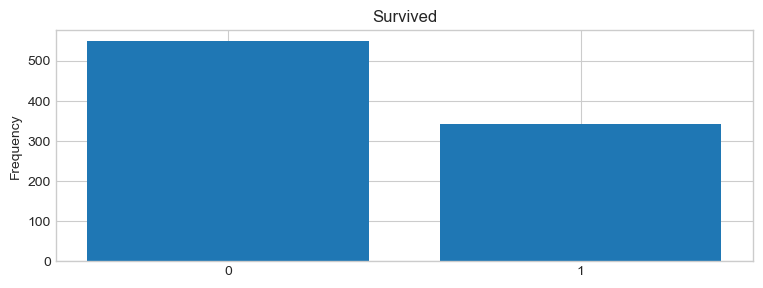

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


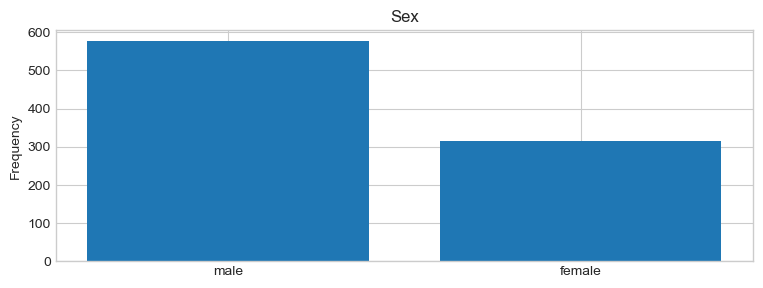

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


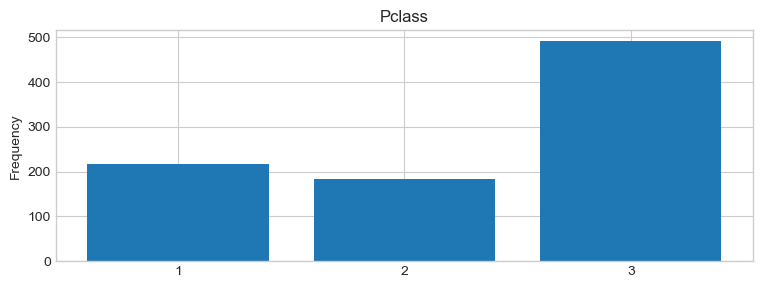

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


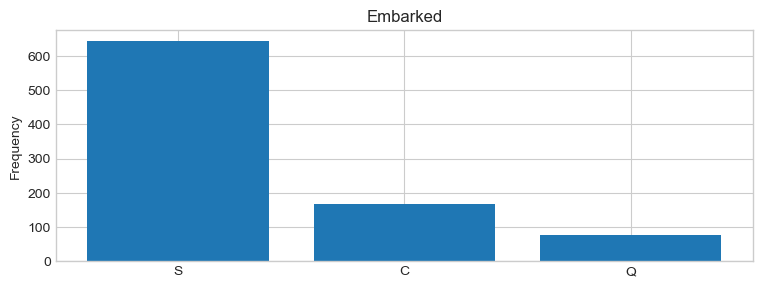

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


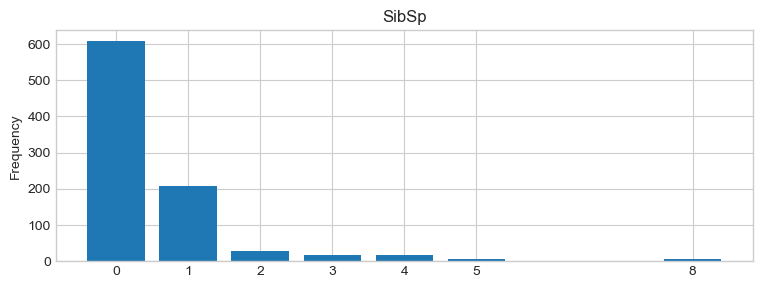

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


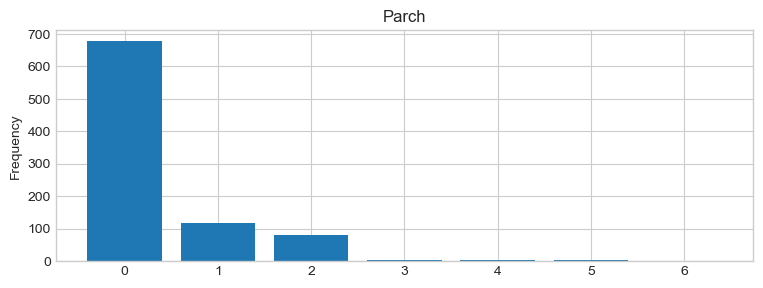

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [7]:
category1= ["Survived", "Sex","Pclass", "Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [8]:
category2= ["Cabin", "Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



<a id = "6"></a><br>

# Numerical Variables

In [9]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable])
    plt.xlabel("Variable")
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

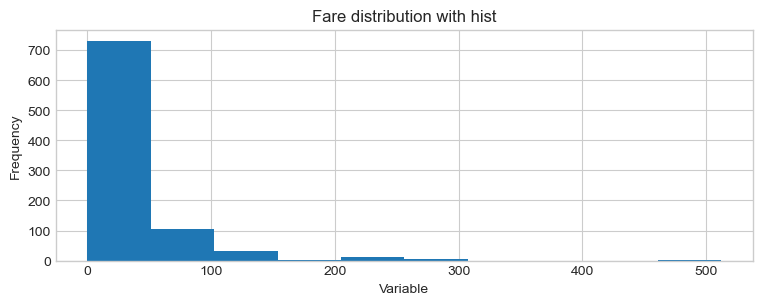

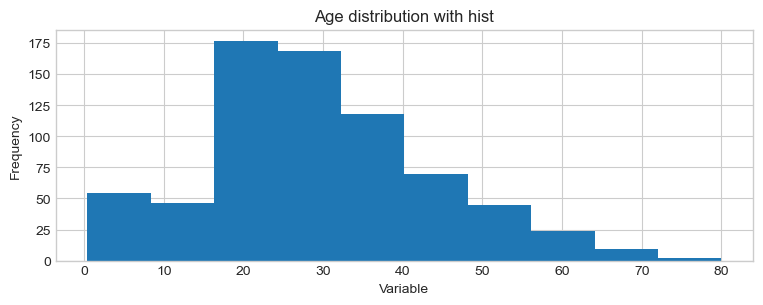

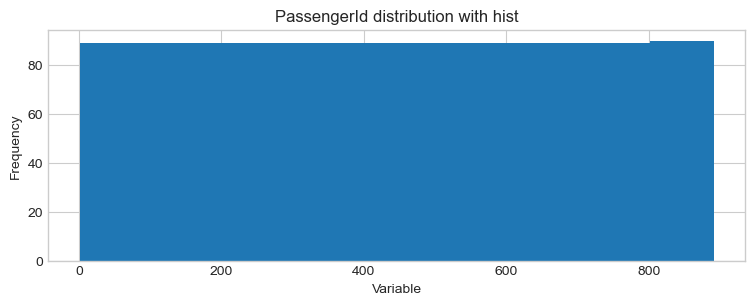

In [10]:
category2= ["Fare", "Age","PassengerId"]
for c in category2:
    plot_hist(c)

<a id = "7"></a><br>

# Basic Data Analysis


* Pcalss - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

* Burada niahi amaç belli başlı featurelar arasındaki ilişkiyi inceleyip buna göre feature extraction işlemi uygulayabilmektir.

In [11]:
# Pclass vs Survived

train_df[["Pclass", "Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


Pclass'a göre (gemide bulunan yere göre) hayatta kalma olasılığı

In [12]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index= False).mean().sort_values(by= "Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Erkekler ve kadınların hayatta kalma olasılığı.

In [13]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index= False).mean().sort_values(by= "Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Gemide bulunan akrabalık ilişkine göre hayatta kalma olasılığı.

In [14]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index= False).mean().sort_values(by= "Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Yanında ebeveyni olanlar ya da çocuğu olanların hayatta kalma olasılığı.

In [15]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index= False).mean().sort_values(by= "Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "8"></a><br>
# Outlier Detection

Outlier detection, istatistiksel veri analizi ve makine öğrenmesi alanlarında kullanılan bir yöntemdir. Veri seti içinde diğer verilere kıyasla beklenmeyen veya anormal davranış sergileyen noktaları tespit etmek için kullanılır. Bu noktalar, genellikle istatistiksel dağılım veya veri kümesinin kalıplarıyla uyumlu olmayan, istisnai veya hatalı değerlerdir.

Outlier detection'ın önemi birkaç nedenden dolayı ortaya çıkar:

Veri doğruluğunu artırır: Anormal değerler veya hatalı veriler, analiz sonuçlarını olumsuz etkileyebilir. Bu nedenle, outlier detection yöntemleri kullanılarak bu hatalar tespit edilebilir ve veri doğruluğu artırılabilir.

Anomalileri belirlemek: Outlier detection, anormal davranış sergileyen verileri tespit etme ve analiz etme konusunda yardımcı olur. Örneğin, finansal analizde, dolandırıcılık veya hileli işlemleri tespit etmek için outlier detection teknikleri kullanılabilir.

Veri analizini iyileştirir: Veri setindeki anormallikleri belirlemek, gerçek dünyadaki durumları veya olayları daha iyi anlamak için analizi geliştirebilir. Outlier detection, veri setindeki nadir olayları veya örüntüleri tespit ederek değerli bilgiler elde etmeye yardımcı olabilir.

Veri ön işleme: Outlier detection, veri setini temizlemek ve ön işleme adımlarını yönlendirmek için kullanılabilir. Anormal değerlere sahip veriler, model eğitimini veya analiz sonuçlarını yanıltabilir. Bu nedenle, outlier detection yöntemleri kullanılarak bu veriler ayıklanabilir veya düzeltilir.

Model performansını artırır: Outlier detection, makine öğrenmesi modellerinin performansını artırabilir. Anormal verilerin tespit edilmesi, modelin yanlış öğrenme veya aşırı uyum gibi sorunlardan kaçınmasına yardımcı olabilir. Ayrıca, outlier detection, modelin sadece normal veri örneklerine odaklanmasını sağlayarak, genel performansı artırabilir.

Sonuç olarak, outlier detection veri analizi ve makine öğrenmesi süreçlerinde önemli bir rol oynar. Anormal verileri tespit etmek, veri doğruluğunu artırır, anormallikleri belirler, veri analizini iyileştirir, veri ön işleme adımlarını yönlendirir ve model performansını artırır.

In [16]:
def detect_outilers(df, features):
    outlier_indices= []
    
    for c in features:
        #1st quartile
        Q1= np.percentile(df[c], 25) 
        #3rd quartile 
        Q3= np.percentile(df[c], 75)
        
        #IQR
        IQR= Q3- Q1
        
        # Outlier step
        outlier_step = IQR* 1.5
        
        #detect outlier and their indices
        
        outlier_list_col= df[(df[c]<Q1 - outlier_step) | (df[c]>Q3 - outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    
    outlier_indices= Counter(outlier_indices)
    multiple_outliers= list(i for i ,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

        
    

In [17]:
train_df.loc[detect_outilers(train_df,["Age", "SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [18]:
# drop outliers
train_df= train_df.drop(detect_outilers(train_df,["Age", "SibSp","Parch","Fare"]), axis=0).reset_index(drop=True)
                        

<a id = "9"></a><br>
# Missing Value

* Find Missing Value
* Fill Missing Value


Eksik değerleri bulmadan önce train ve test dataframeleri birleştirelim.


In [19]:
train_df_len= len(train_df)
train_df= pd.concat([train_df, test_df],axis=0).reset_index(drop=True)

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "10"></a><br>
# Find Missing Value

train datasında hangi colunmlarda eksik veri var bunları detect ettik.

In [21]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Kaç tane missing value olduğunu da öğrenelim.

In [22]:
train_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            243
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          864
Embarked         2
dtype: int64

<a id = "11"></a><br>
# Fill Missing Value

* Embarked ve Fare features


Embarked value'nun boş değerlerine bakıp, bu iki boş değeri diğer öznitelikleri kullanarak doldurabiliriz. bu iki satır Embarked değerini doldurmak için Fare özniteliğinden yararlanabiliriz. Yani verilen paraya göre hani  limandan bindiklerini çıkarabiliriz.

In [23]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
633,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Fare özniteliğine göre doldurmak için Fare için bir box plot çizdirelim.

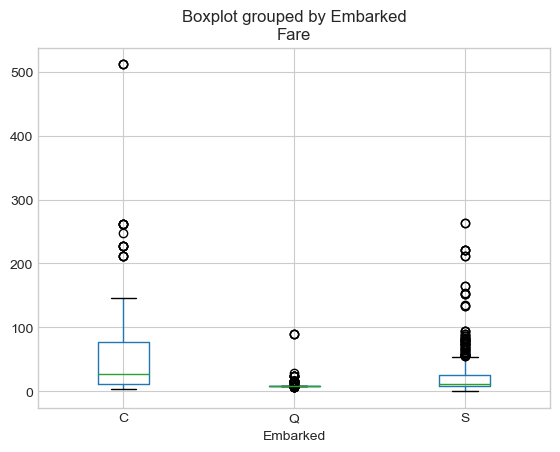

In [24]:
train_df.boxplot(column= "Fare", by= "Embarked")
plt.show()

Medyan değeri 80'e daha yakın olan Embarked değeri "C" limanıdır.

In [25]:
train_df["Embarked"]= train_df["Embarked"].fillna("C")

In [26]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


şimdi ise Fare sütununu doldurma işlemine geçelim.

In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
830,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Fare dışındaki diğer öznitelikler incelenirse, Pclass'a bakmak daha anlamlı olacaktır.

In [28]:
train_df[train_df["Pclass"]==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
9,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1091,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1093,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1094,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Pclass değrinin sadece 3 olan yolcuların ödediği miktarın ortalamasını alıp ardından boş olan Fare satırını doldurabiliriz

In [29]:
np.mean(train_df[train_df["Pclass"]==3]["Fare"])

10.907475250836121

In [30]:
train_df["Fare"]= train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [31]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "12"></a><br>

# Visualization

<a id = "13"></a><br>

### Correlation Between SipSp---Parch---Age---Fare---Survived

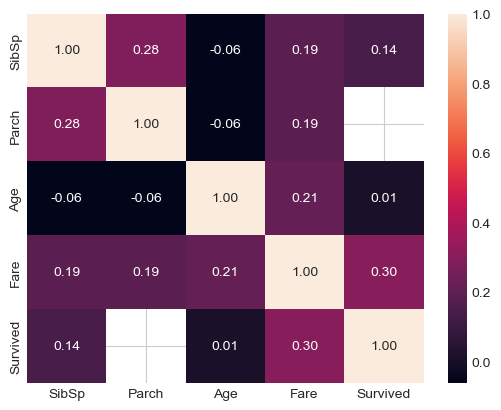

In [32]:
list1= ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt= ".2f")
plt.show()

Fare ve Survived feature arasında bir ilişki vardır. (0.30)

<a id = "14"></a><br>

### Correlation Between SipSp---Survived

Gemide bir ilişiği bulunan insanlar için ilişiği bulunan insan sayısı üçe kadar hayatta kalma olasılığı artarken 3 den sonra sert bir düşüş söz konusudur. Haliyle burada SibSb=3 şeklinde bir threshold ya da yeni bir özellik tanımlanması olasıdır. 

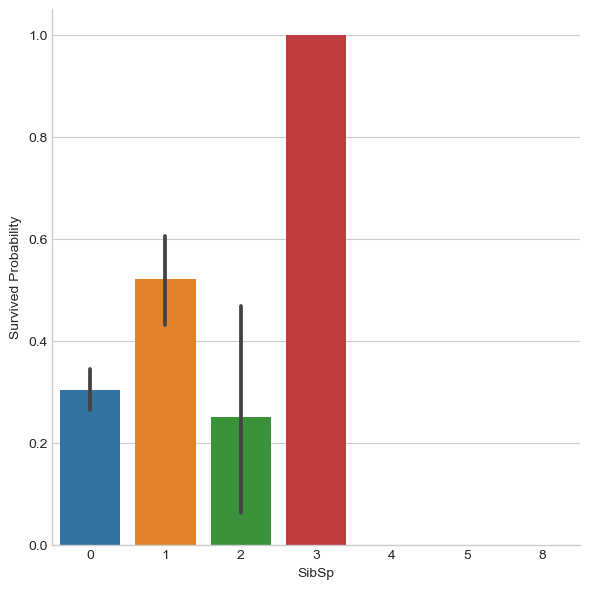

In [33]:
g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "15"></a><br>

### Correlation Between Parch---Survived

Gemide hiç ebeveyni ya da çoçuğu bulunmayan kişileri hayatta kalma olasılığı olan kişilerden fazla olanlara göre oldukça fazladır. Tek başına gelen kişilerin hayatta kalma olasılığı yüksektir.

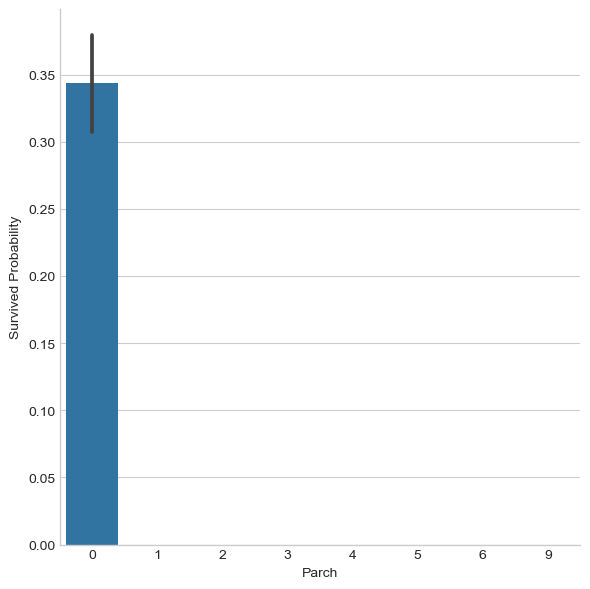

In [34]:
g = sns.catplot(x="Parch", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()

SibSp ve Parch değişkenleri bireylerin aile bağlantılarını içerdiği için beraber kullanılarak yeni bir feture elde edilebilir. Ortak bir bağlantı kullanılabilir. 

<a id = "16"></a><br>

### Correlation Between Pclass---Survived

En pahalı kısımda hayatta kalma olasılığı iki ve üçe göre daha yüksektir.

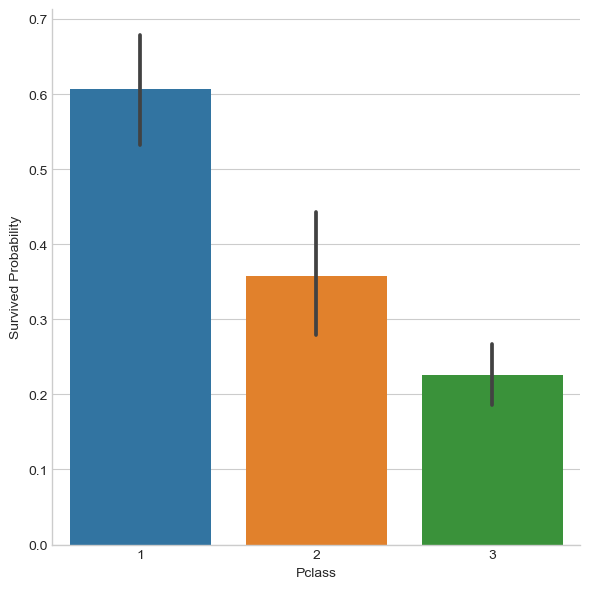

In [35]:
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "17"></a><br>

### Correlation Between Age---Survived

* Age değeri 10' dan küçük değerler için hayatta kalma olasılığı yüksektir.
* Yaşlı yolcular (80) hayatta kalabilmiştir.
* 20li yaşlar hayatta kalma olasılığı düşüktür.
* yolcu yaş dağılımı genellike 15-35 yaş aralığındadır.
* Age feture'ının değerlerini doldururken bu değerler kullanılabilir.

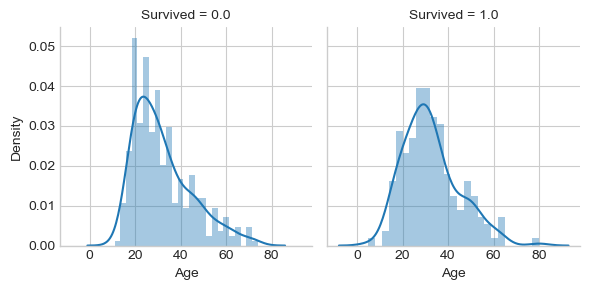

In [36]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

<a id = "18"></a><br>

### Correlation Between Pclass---Age---Survived

Pclass önemli bir etken olacaktır.

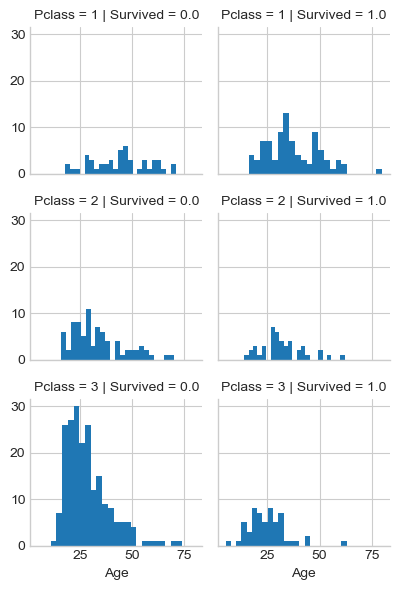

In [37]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass", height=2)
g.map(plt.hist, "Age", bins=23)
g.add_legend()


<a id = "19"></a><br>

### Correlation Between Embarked---Sex---Pclass---Survived

* Kadınların hayatta kalma olasılığı erkeklerin hayatta kalma olasılığından daha yüksektir.
* Erkeklerin C limanından binişinde hayatta kalma olasılığı daha yüksekken,
* Embbarked ve Sex feature'larını direkt olarak kullanabiliriz.

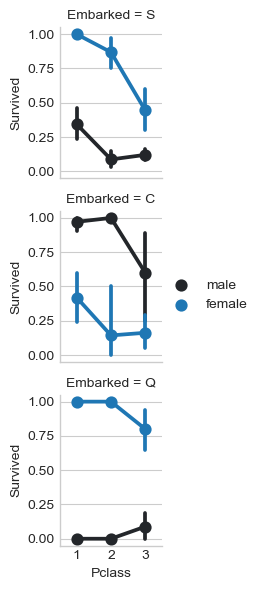

In [38]:
g = sns.FacetGrid(train_df ,row="Embarked", height=2)
g.map(sns.pointplot,"Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

<a id = "20"></a><br>

### Correlation Between Embarked---Sex---Fare---Survived

* Birinci çizimde S limanından binen insanlardan az para ödeyenler hayatta kalamazken, daha fazla para ödeyen yolcuların hayatta kaldığını görebiliriz.
* C limaından binen yolcularında da aynı şekilde
* Q limanından da binen yolcular için aynı şey geçerlidir.


* Fare ile ilgili bir thresh koyarak burada feature extraction gerçekleştirebiliriz.

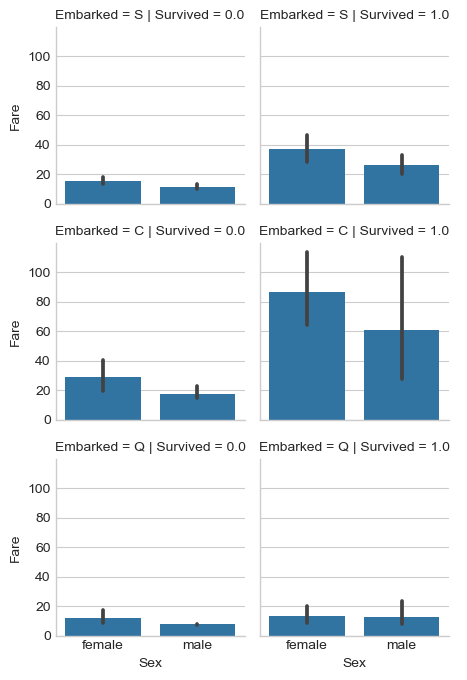

In [39]:
g= sns.FacetGrid(train_df, row="Embarked", col="Survived", height=2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

<a id = "21"></a><br>

# Fill Missing: Age Feature

Yaşa bakarken sibSp ve Parch sütunlarından yararlanabiliriz, ya da kadın erkek yaş ortalamalarının dağılımına bakılabilir. Ya da binilen limalardaki yaş ortalamaarına bakılarak da yaş sütunu doldurabilir. Bunları hibrit bir şekilde de yapmak mümkündür.

In [40]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
14,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
19,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
20,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1088,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1091,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1094,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Cinsiyet ile doldurmak istersek:


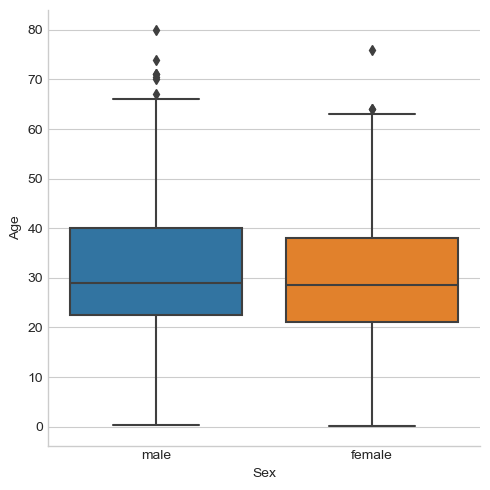

In [41]:
sns.catplot(x="Sex", y="Age", data=train_df, kind="box")

Sex feature'si bir işe yaramıyor çünkü ortalama olarak kadın ve erkek yaş dağılımları ve medyanı aynıdır.

##### Sex Age ve Pclass'a bakalım

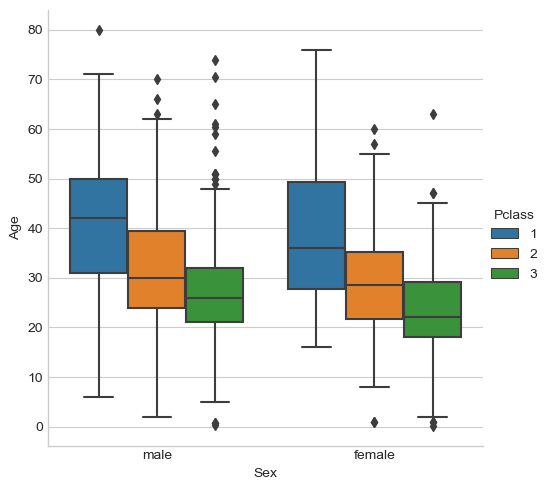

In [42]:
sns.catplot(x="Sex", y="Age",hue= "Pclass", data=train_df, kind="box")

* Birinci sınıfta kalan yolcularımızın yaş ortalamaları 40 diyebiliriz.
* İkinci sınıfta kalan yolcularımızın yaş ortalamaları 30 diyebiliriz.
* Üçüncü sınıfta kalan yolcularımızın yaş ortalamaları 25 diyebiliriz.


###### Parch ve SibSb değişkenlerinin Age üzerindeki dağılımlara bakalım.

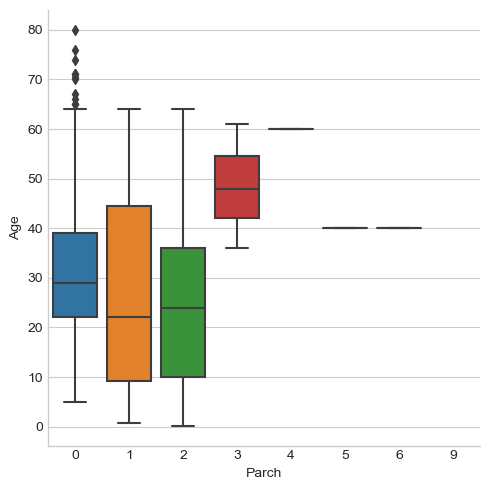

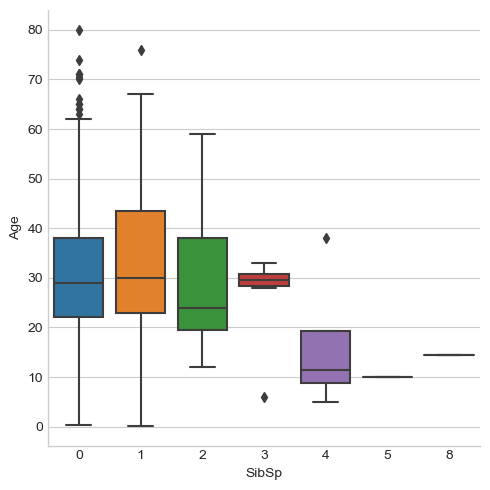

In [43]:
sns.catplot(x="Parch", y="Age", data=train_df, kind="box")
sns.catplot(x="SibSp", y="Age", data=train_df, kind="box")
plt.show()

Cinsiyet satırı str ifadeden oluştuğu için 1 ve 0 olarak etiketleyeceğiz.

In [44]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

 ###### İncelediğimiz her özellik için bir korelasyon var mı ona bakalım. HeatMap kullanarak.

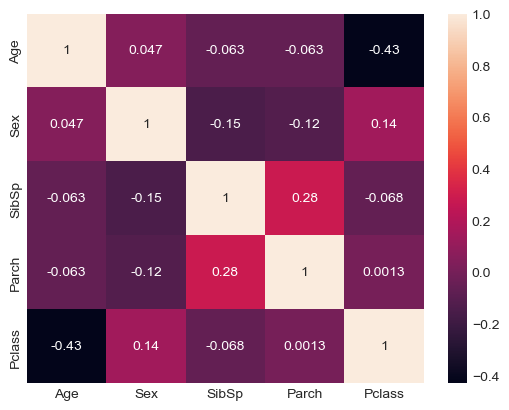

In [45]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot=True)
plt.show()

Age feature'nın Sex feature'ı ile bir korelasyonu yok. Ama Parch , SibSp ve Pclass ile ilişkisi vardır. 

In [46]:
index_nan_age= list(train_df["Age"][train_df["Age"].isnull()].index)

Age feature boş olan tüm indexlerde dolaşıp ardından bu indexlerdeli Parch , SibSp ve Pclass özelliklerine bakacağız.

In [47]:
import numpy as np


In [48]:
index_nan_age= list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if age_pred is not None and not np.isnan(age_pred):
        
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med





In [49]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "22"></a><br>

# Feature Engineering

* Name ve Title

<a id = "23"></a><br>
##### Name Ve Title

İsimlerden yola çıkılamayabilir fakat bazı insanların title'ları var ve biz bunlarla survived feature arasında bir ilişki kurabiliriz.

In [50]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                  Nasser, Mrs. Nicholas (Adele Achem)
8                             Bonnell, Miss. Elizabeth
9                       Saundercock, Mr. William Henry
Name: Name, dtype: object

İsimlerde bulunan Mr ve Mrs titleleri çekmek için önce noktaya göre ayırmak ve daha sonra da virgüle göre ayırma işlemi yapabiliriz.

In [51]:
name= train_df["Name"]
train_df["Title"]= [i.split(".")[0] .split(",")[-1].strip() for i in name]


In [52]:
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

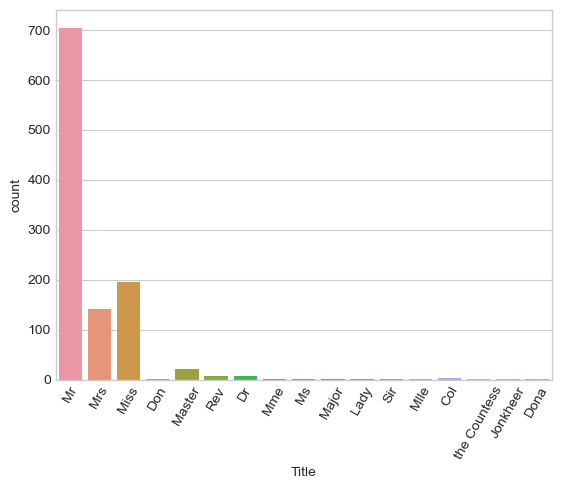

In [53]:
sns.countplot(x="Title", data= train_df)
plt.xticks(rotation=60)
plt.show()

Çok fazla kategori varlığı söz konusu olduğu için bunları "dört" kategori haline getireceğiz.

In [54]:
#convert to categorical
train_df["Title"]= train_df["Title"].replace(["Lady", "the Countess", "Capt","Don","Dr","Sir","Major","Rev","Jonkheer","Dona","Col"], "other")
train_df["Title"]= [0 if i== "Master" else 1 if i== "Miss" or i== "Ms" or i=="Mlle" or i== "Mrs" else 2 if i== "Mr" else 3 for i in train_df["Title"]]

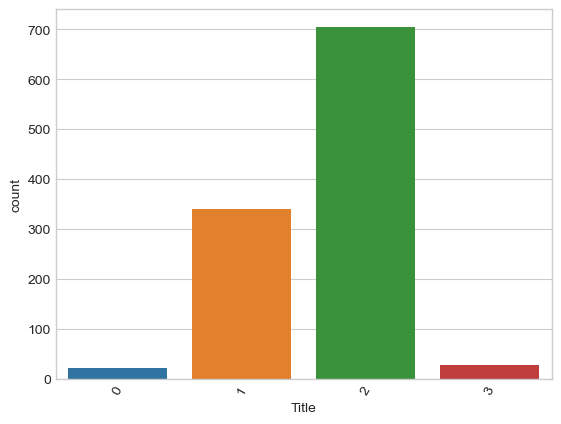

In [55]:
sns.countplot(x="Title", data= train_df)
plt.xticks(rotation=60)
plt.show()

In [56]:
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     1
8     1
9     2
10    1
11    1
12    2
13    1
14    1
15    2
16    2
17    1
18    2
19    2
Name: Title, dtype: int64

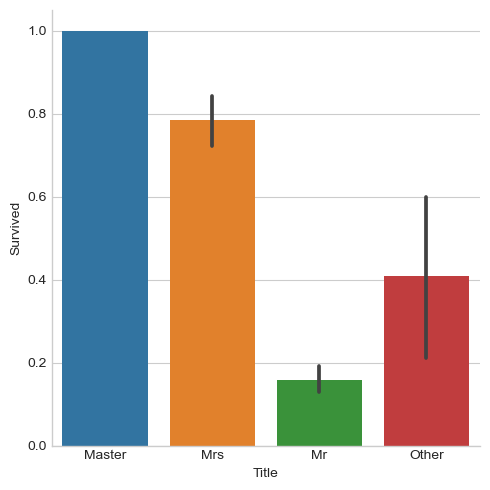

In [57]:
g = sns.catplot(x= "Title", y="Survived", data= train_df, kind= "bar")
g.set_xticklabels(["Master", "Mrs","Mr","Other"])
g.set_ylabels= ("Survival Probablity")
plt.show()

In [58]:
train_df.drop(labels= ["Name"], axis=1, inplace=True)

In [59]:
train_df= pd.get_dummies(train_df, columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id = "24"></a><br>

# Feature Engineering Family Size

In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [61]:
train_df["Fsize"]= train_df["SibSp"] + train_df["Parch"] + 1


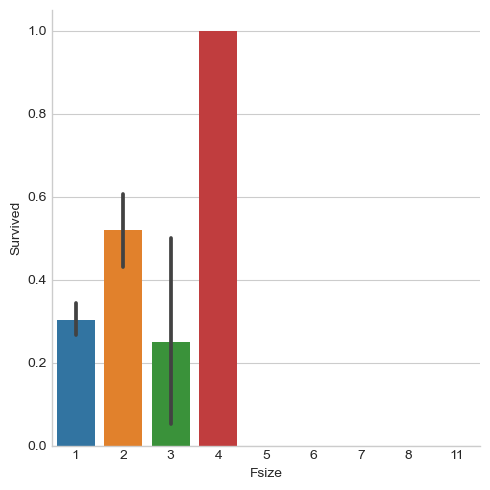

In [62]:
#Survived Fsize İlşkisi
g= sns.catplot(x= "Fsize", y= "Survived", data= train_df, kind="bar")
g.set_ylabels= ("Survival Probablity")
plt.show()

Dört değerini bir threshold belirleyelim. Fsize artık iki farkı şekilde ifade edilsin 0 ve 1 

In [63]:
train_df["family_size"]= [1 if i<4 else 0 for i in train_df["Fsize"]]

In [64]:
train_df.head(200)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,258,1.0,1,0,30.0,0,0,110152,86.5000,B77,S,0,1,0,0,1,1
196,259,1.0,1,0,35.0,0,0,PC 17755,512.3292,NaN,C,0,1,0,0,1,1
197,261,0.0,3,1,25.0,0,0,384461,7.7500,NaN,Q,0,0,1,0,1,1
198,264,0.0,1,1,40.0,0,0,112059,0.0000,B94,S,0,0,1,0,1,1


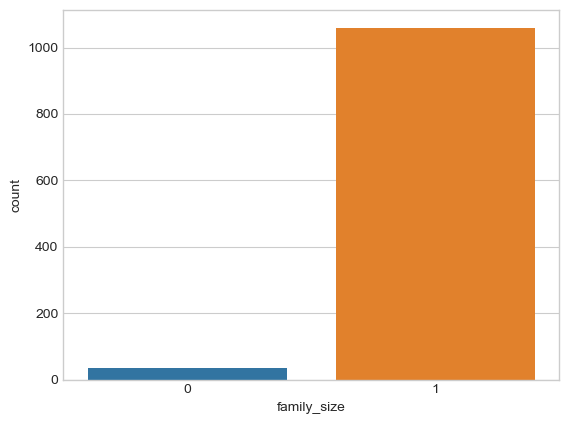

In [65]:
sns.countplot(x= "family_size", data= train_df)
plt.show()

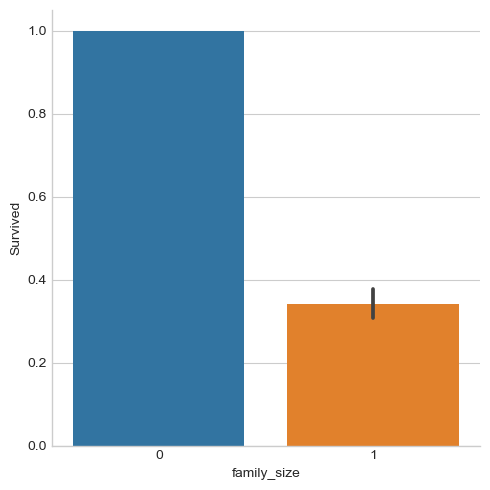

In [66]:
#Survived family_size İlşkisi
g= sns.catplot(x= "family_size", y= "Survived", data= train_df, kind="bar")
g.set_ylabels= ("Survival Probablity")
plt.show()

küçük ailelerin büyük ailelere göre hayatta kalma şansı daha yüksektir. Family_size ' i ikiye böleceğiz. 0 ve 1 den oluşacak şekilde

In [67]:
train_df= pd.get_dummies(train_df, columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id = "25"></a><br>

# Embarked 

In [68]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

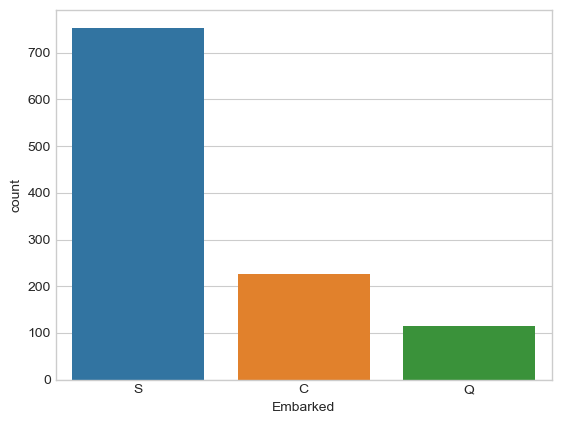

In [69]:
sns.countplot(x= "Embarked", data= train_df)
plt.show()

In [70]:
train_df= pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id = "26"></a><br>

# Ticket 

In [71]:
tickets= []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"]= tickets    

In [72]:
train_df["Ticket"].head()

0        A5
1        PC
2    STONO2
3         x
4         x
Name: Ticket, dtype: object

In [73]:
train_df= pd.get_dummies(train_df, columns=["Ticket"], prefix= "T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id = "27"></a><br>

# Pclass 

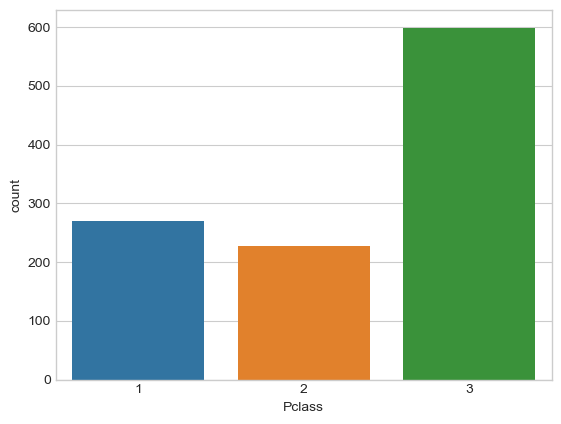

In [74]:
sns.countplot(x= "Pclass", data= train_df)
plt.show()

In [75]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df= pd.get_dummies(train_df, columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id = "28"></a><br>

# Sex 

In [76]:
train_df["Sex"]= train_df["Sex"].astype("category")
train_df= pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "29"></a><br>

# Drop PassengerId and Cabin

In [77]:
train_df.drop(labels= ["PassengerId", "Cabin"], axis=1, inplace=True)
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0.0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "30"></a><br>

# Modeling

In [78]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "31"></a><br>

#  Train Test Split

In [79]:
test = train_df[train_df_len:]
test.drop(labels= ["Survived"], axis=1, inplace=True)
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
678,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
679,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
680,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
681,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
682,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [80]:
train = train_df[:train_df_len]
x_train= train.drop(labels= ["Survived"], axis=1)
y_train= train["Survived"]
x_train, x_test, y_train, y_test= train_test_split(x_train, y_train, test_size= 0.33, random_state=42)
print("X_train", len(x_train))
print("x_test", len(x_test))
print("y_train", len(y_train))
print("y_test", len(y_test))

X_train 454
x_test 224
y_train 454
y_test 224


<a id = "32"></a><br>

#  Logistic Regression

In [81]:
logReg= LogisticRegression()
logReg.fit(x_train, y_train)
acc_log_train= round(logReg.score(x_train, y_train)*100,2)
acc_log_test= round(logReg.score(x_test, y_test)*100,2) 

In [82]:
print("Traning Accuracy: %",acc_log_train)
print("Test Accuracy: %",acc_log_test)

Traning Accuracy: % 82.38
Test Accuracy: % 83.04


<a id = "33"></a><br>

# HyperParameter Tuning---Grid Search---Cross Validation

* 5 Farklı Makine Öğrenmesi Algoritmalarını Karşılaştırma Ve Değerlendirme
* Stratified Cross Validation Kullanarak Doğruluk Ortalamalarını Bulma

* **Decision Tree**
* **SVM**
* **Random Forest**
* **KNN**
* **Logistic Regression**

random_state: Rastgelelik kullanılan yerlerde tekrarlanabilir sonuçlar elde etmek için kullanılan bir parametre.
classifier: Sınıflandırma algoritmalarını içeren bir liste. Listede yer alan algoritmalar: Karar Ağaçları (DecisionTreeClassifier), Destek Vektör Makineleri (SVC), Rastgele Orman (RandomForestClassifier), Lojistik Regresyon (LogisticRegression) ve K-En Yakın Komşu (KNeighborsClassifier).
dt_param_grid: Karar Ağacı sınıflandırıcısı için kullanılacak parametrelerin bir grid'i. min_samples_split ve max_depth parametrelerinin farklı değerlerini denemek üzere ayarlanmış.
svc_param_grid: Destek Vektör Makineleri sınıflandırıcısı için kullanılacak parametrelerin bir grid'i. "rbf" çekirdeği, "gamma" ve "C" parametrelerinin farklı değerlerini denemek üzere ayarlanmış.
rf_param_grid: Rastgele Orman sınıflandırıcısı için kullanılacak parametrelerin bir grid'i. max_features, min_samples_split, min_samples_leaf, bootstrap, n_estimators ve criterion parametrelerinin farklı değerlerini denemek üzere ayarlanmış.
logreg_param_grid: Lojistik Regresyon sınıflandırıcısı için kullanılacak parametrelerin bir grid'i. "C" ve "penalty" parametrelerinin farklı değerlerini denemek üzere ayarlanmış.
knn_param_grid: K-En Yakın Komşu sınıflandırıcısı için kullanılacak parametrelerin bir grid'i. n_neighbors, weights ve metric parametrelerinin farklı değerlerini denemek üzere ayarlanmış.
classifier_param: Her bir sınıflandırma algoritması için kullanılacak parametre grid'lerini içeren bir liste.

###### Decision Tree Grid 

"min_samples_split": Bu parametre, bir iç düğümün daha fazla bölünmeden önce kaç örneğe sahip olması gerektiğini belirtir. range(10,500,20) ifadesi, 10'dan başlayarak 500'e kadar (dahil değil) 20'şer artan değerlerin kullanılacağını gösterir. Yani, bu parametre için 10, 30, 50, 70, ... 490 değerleri denenecektir.

"max_depth": Bu parametre, bir Karar Ağacı'nın maksimum derinliğini belirtir, yani ağaçtaki en uzun yolun düğüm sayısını temsil eder. range(1,20,2) ifadesi, 1'den başlayarak 20'ye kadar (dahil değil) 2'şer artan değerlerin kullanılacağını gösterir. Yani, bu parametre için 1, 3, 5, 7, ... 19 değerleri denenecektir.

Bu parametreler, Karar Ağacı sınıflandırıcısının performansını etkileyen önemli faktörlerdir. Grid arama yöntemiyle, farklı min_samples_split ve max_depth değerlerinin kombinasyonları denenerek, en iyi performansı sağlayan parametrelerin bulunması amaçlanır.

###### SVC Grid

"kernel": Bu parametre, SVC'nin kullanacağı çekirdek fonksiyonunu belirtir. "rbf" (Radyal Temel Fonksiyon) çekirdeği, en yaygın kullanılan çekirdeklerden biridir. Diğer olası değerler arasında "linear" (doğrusal), "poly" (polinom), "sigmoid" vb. çekirdek fonksiyonları bulunabilir. Ancak svc_param_grid örneğinde yalnızca "rbf" çekirdek fonksiyonu kullanıldığı görülüyor.

"gamma": Bu parametre, RBF çekirdeği için kullanılan gamma değerini belirtir. Gamma, veri noktalarının etki alanını kontrol eden bir parametredir. gamma listesi, denenecek farklı gamma değerlerini içerir. Bu örnekte, 0.001, 0.01, 0.1 ve 1 değerleri kullanılacaktır.

"C": Bu parametre, SVC'nin düzenlileştirme (regülarizasyon) parametresi olan C'yi belirtir. C değeri, sınıflandırma hatasını en aza indirmek ve karar sınırının düzgünlüğünü kontrol etmek arasında bir denge kurar. C listesi, denenecek farklı C değerlerini içerir. Bu örnekte, 1, 10, 50, 100, 200, 300 ve 1000 değerleri kullanılacaktır.

Bu parametreler, SVC sınıflandırıcısının performansını etkileyen önemli faktörlerdir. Grid arama yöntemiyle, farklı kernel, gamma ve C değerlerinin kombinasyonları denenerek, en iyi performansı sağlayan parametrelerin bulunması amaçlanır.

###### Random Forest Grid

max_features": Bu parametre, her bir karar düğümünde göz önünde bulundurulacak maksimum özellik sayısını belirtir. Grid'de [1, 3, 10] değerleri kullanılmıştır, yani her bir karar düğümünde 1, 3 veya 10 özellik değeri göz önünde bulundurulacaktır.

"min_samples_split": Bu parametre, bir iç düğümün bölünmesi için gereken minimum örnek sayısını belirtir. Grid'de [2, 3, 10] değerleri kullanılmıştır, yani bir iç düğümün bölünmesi için en az 2, 3 veya 10 örneğin olması gerekmektedir.

"min_samples_leaf": Bu parametre, bir yaprak düğümünde bulunması gereken minimum örnek sayısını belirtir. Grid'de [1, 3, 10] değerleri kullanılmıştır, yani bir yaprak düğümünde en az 1, 3 veya 10 örnek olması gerekmektedir.

"bootstrap": Bu parametre, Rastgele Orman'ın örnekleme yöntemini kontrol eder. False olarak ayarlandığında, bootstrap örnekleme yapılmaz ve tüm veri seti kullanılır.

"n_estimators": Bu parametre, Rastgele Orman içindeki karar ağaçlarının sayısını belirtir. Grid'de [100, 300] değerleri kullanılmıştır, yani 100 veya 300 karar ağacı kullanılacaktır.

"criterion": Bu parametre, karar ağaçlarının bölünme noktalarını değerlendirmek için kullanılan kriteri belirtir. "gini" kriteri, Gini impurity kriterini ifade eder.

Bu parametreler, Rastgele Orman sınıflandırıcısının performansını etkileyen faktörlerdir. Grid arama yöntemiyle, farklı max_features, min_samples_split, min_samples_leaf, bootstrap, n_estimators ve criterion değerlerinin kombinasyonları denenerek, en iyi performansı sağlayan parametrelerin bulunması amaçlanır.

###### Logistic Regression Grid


"C": Bu parametre, Lojistik Regresyon modelinin düzenlileştirme (regülarizasyon) katsayısını belirtir. np.logspace(-3,3,7) ifadesi, -3'ten 3'e kadar (dahil değil) 7 adet logaritmik aralıkta C değerlerini deneyeceğini belirtir. Yani, bu örnekte -0.001, 0.01, 0.1, 1, 10, 100 ve 1000 gibi C değerleri kullanılacaktır.

"penalty": Bu parametre, düzenlileştirme türünü belirtir. "l1" ve "l2" değerleri kullanılmıştır. "l1" düzenlileştirmesi, L1 normunu kullanarak düzenlileştirme yapar ve bazı özellikleri sıfır yaparak özellik seçimi yapmaya yardımcı olabilir. "l2" düzenlileştirmesi ise L2 normunu kullanarak düzenlileştirme yapar ve tüm özellikleri küçültmeye yardımcı olur.

Bu parametreler, Lojistik Regresyon sınıflandırıcısının performansını etkileyen önemli faktörlerdir. Grid arama yöntemiyle, farklı C ve penalty değerlerinin kombinasyonları denenerek, en iyi performansı sağlayan parametrelerin bulunması amaçlanır.

###### KNN Grid

"n_neighbors": Bu parametre, KNN algoritmasında kullanılacak olan komşu sayısını belirtir. np.linspace(1,19,10, dtype=int).tolist() ifadesi, 1'den 19'a (dahil değil) kadar olan sayıları içeren bir liste oluşturur. Ancak bu liste 10 elemana sahip olacak şekilde eşit aralıklı olarak sayıları seçer. Örneğin, 1, 3, 5, 7, 9, 11, 13, 15, 17 ve 18 gibi komşu sayıları kullanılacaktır.

"weights": Bu parametre, komşuların sınıflandırmadaki ağırlığını belirtir. "uniform" değeri, tüm komşuların eşit ağırlığa sahip olduğunu ifade ederken, "distance" değeri, komşuların uzaklıklarına ters orantılı olarak ağırlıklandırıldığını ifade eder.

"metric": Bu parametre, uzaklık metriğini belirtir. KNN algoritmasında kullanılan iki yaygın metrik "euclidean" (Öklidyen uzaklık) ve "manhattan" (Manhattan uzaklık) olarak belirtilmiştir.

Bu parametreler, KNN sınıflandırıcısının performansını etkileyen faktörlerdir. Grid arama yöntemiyle, farklı n_neighbors, weights ve metric değerlerinin kombinasyonları denenerek, en iyi performansı sağlayan parametrelerin bulunması amaçlanır.

In [84]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [86]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8282608695652174
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8015942028985507
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.834830917874396
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8214975845410628
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7950724637681159


Text(0.5, 1.0, 'Cross Validation Scores')

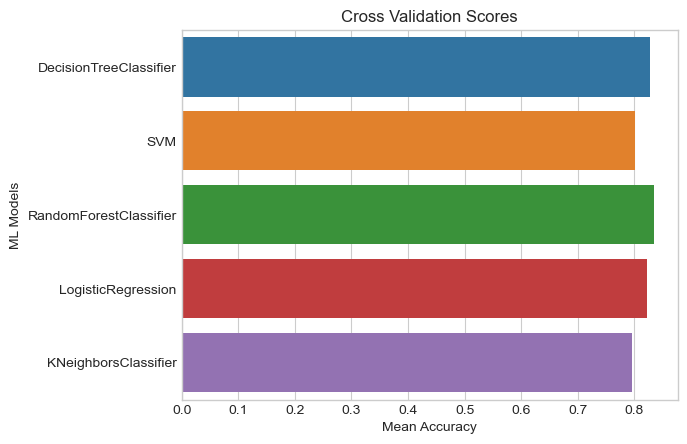

In [88]:
cv_results = pd.DataFrame({"Cross Validation Means": cv_result, "ML Models": ["DecisionTreeClassifier", "SVM", "RandomForestClassifier", "LogisticRegression", "KNeighborsClassifier"]})
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")


<a id = "34"></a><br>

# Ensemble Modeling

In [91]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8080357142857143


<a id = "35"></a><br>
# Prediction and Submission

In [92]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)